In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras 
import warnings

warnings.filterwarnings('ignore')
print(tf.__version__)
for model in sklearn, pd, keras, np ,mlp:
    print(model.__name__, model.__version__)

2.1.0
sklearn 0.20.2
pandas 0.24.2
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
numpy 1.17.4
matplotlib 2.1.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [4]:
# version 0.2 数据归一化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid = std.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test = std.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

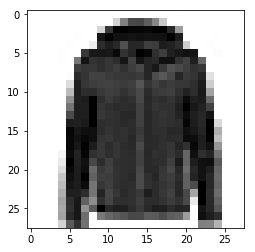

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()

show_single_image(x_train[0])

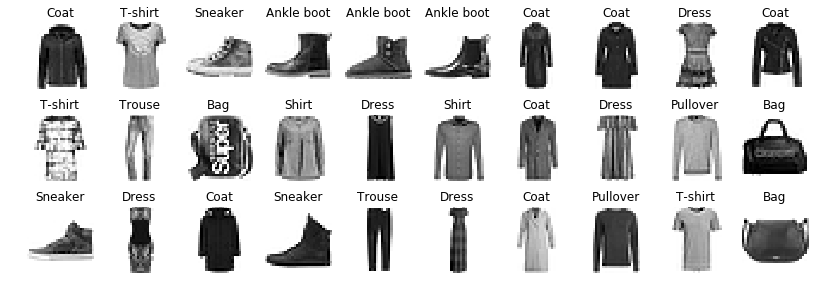

In [6]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index +1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
            
class_names = ['T-shirt', 'Trouse', 'Pullover', 'Dress', 'Coat', 'Sandal', "Shirt", 'Sneaker', 'Bag', 'Ankle boot']

show_images(3, 10, x_train, y_train, class_names)

In [7]:
# tf.keras.models.Sequential()
"""
model = tf.keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
"""
model = tf.keras.models.Sequential(
[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


# sparse_categorical_crossentropy:  如果y是一个数，会把它转化成一个向量，如 y->index., y->one hot->[]
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4581 - accuracy: 0.8332 - val_loss: 0.3692 - val_accuracy: 0.8720
Epoch 2/10
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3521 - accuracy: 0.8709 - val_loss: 0.3341 - val_accuracy: 0.8742
Epoch 3/10
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3175 - accuracy: 0.8811 - val_loss: 0.3289 - val_accuracy: 0.8798
Epoch 4/10
55000/55000 [==============================] - 3s 52us/sample - loss: 0.2940 - accuracy: 0.8902 - val_loss: 0.3070 - val_accuracy: 0.8904
Epoch 5/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.2739 - accuracy: 0.8987 - val_loss: 0.3214 - val_accuracy: 0.8844
Epoch 6/10
55000/55000 [==============================] - 3s 50us/sample - loss: 0.2569 - accuracy: 0.9029 - val_loss: 0.3140 - val_accuracy: 0.8900
Epoch 7/10
55000/55000 [==============================] -

In [10]:
history.history

{'loss': [0.4581074184135957,
  0.3521459218978882,
  0.31747663478309457,
  0.29396347219944,
  0.2738638268340718,
  0.25694696349013935,
  0.24432429224577817,
  0.23054726519042795,
  0.22017247614535418,
  0.20689618033929305],
 'accuracy': [0.8331818,
  0.8708909,
  0.8810727,
  0.8902364,
  0.8987091,
  0.9029091,
  0.90745455,
  0.9126545,
  0.9160727,
  0.9210909],
 'val_loss': [0.36916447622776033,
  0.3341020707249641,
  0.32888476643562314,
  0.3070068859755993,
  0.3214260850906372,
  0.3140179005354643,
  0.30808756464123727,
  0.3038923479735851,
  0.31328833612054585,
  0.3567312248304486],
 'val_accuracy': [0.872,
  0.8742,
  0.8798,
  0.8904,
  0.8844,
  0.89,
  0.8934,
  0.8916,
  0.893,
  0.8872]}

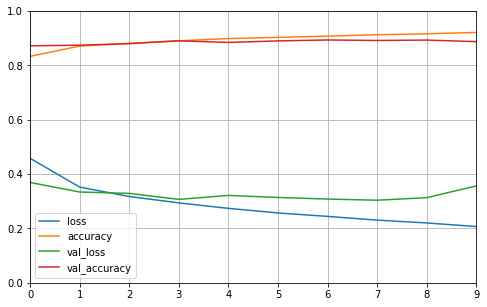

In [11]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curve(history)

In [12]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 50us/sample - loss: 42.4081 - accuracy: 0.7273


[42.408063388824466, 0.7273]